##Import Libraries:

First, import the necessary libraries.

In [1]:
import pandas as pd


##Load Data:

Load your dataset into Pandas DataFrames. 
Use the pd.read_csv() function for CSV files.

In [2]:
app_store_df = pd.read_csv('AppleStore.csv')
app_df = pd.read_csv('appleStore_description.csv')


In [3]:
app_store_df.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
# List of column names you want to retain
columns_to_keep = ['id', 'track_name', 'price', 'rating_count_tot', 'user_rating', 'prime_genre', 'lang_num']

# Create a new DataFrame with only the specified columns
app_store_df = app_store_df[columns_to_keep]


In [5]:
app_store_df.head(5)

,id,track_name,price,rating_count_tot,user_rating,prime_genre,lang_num
0,281656475,PAC-MAN Premium,3.99,21292,4.0,Games,10
1,281796108,Evernote - stay organized,0.00,161065,4.0,Productivity,23
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,Weather,3
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,Shopping,9
4,282935706,Bible,0.00,985920,4.5,Reference,45


In [6]:
app_df.head(5)

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [7]:
# List of column names you want to retain
columns_to_keep = ['id', 'app_desc']

# Create a new DataFrame with only the specified columns
app_df = app_df[columns_to_keep]

In [8]:
app_df.head(5)

,id,app_desc
0,281656475,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Let Evernote change the way you organize your ...
2,281940292,Download the most popular free weather app pow...
3,282614216,The eBay app is the best way to find anything ...
4,282935706,On more than 250 million devices around the wo...


##Check Unique IDs:

To check the number of unique IDs in both tables:

In [9]:
unique_ids_app_store = app_store_df['id'].nunique()
unique_ids_app = app_df['id'].nunique()


In [10]:
unique_ids_app_store

7197

In [11]:
unique_ids_app

7197

##Check for Missing Values:

To check for missing values in the 'AppStore' table:

In [12]:
missing_values_app_store = app_store_df[['track_name', 'user_rating', 'prime_genre']].isnull().any(axis=1).sum()


In [13]:
missing_values_app_store

0

To check for missing values in the 'App' table:

In [14]:
missing_values_app = app_df['app_desc'].isnull().sum()


In [15]:
missing_values_app

0

##Count Apps per Genre:

To count the number of apps per genre in the 'AppStore' table:

In [16]:
apps_per_genre = app_store_df['prime_genre'].value_counts().reset_index()
apps_per_genre.columns = ['prime_genre', 'NumApps']


In [17]:
apps_per_genre

,prime_genre,NumApps
0,Games,3862
1,Entertainment,535
2,Education,453
3,Photo & Video,349
4,Utilities,248
5,Health & Fitness,180
6,Productivity,178
7,Social Networking,167
8,Lifestyle,144
9,Music,138


##Statistics about User Ratings:

To calculate statistics about user ratings in the 'AppStore' table:

In [18]:
max_rating = app_store_df['user_rating'].max()
min_rating = app_store_df['user_rating'].min()
avg_rating = app_store_df['user_rating'].mean()


In [19]:
max_rating

5.0

In [20]:
min_rating

0.0

In [21]:
avg_rating

3.526955675976101

##Price Distribution of Apps:

To create a price distribution of apps:

In [22]:
app_store_df['PriceBinStart'] = (app_store_df['price'] // 2) * 2
app_store_df['PriceBinEnd'] = app_store_df['PriceBinStart'] + 2
price_distribution = app_store_df.groupby(['PriceBinStart', 'PriceBinEnd']).size().reset_index(name='NumApps')


In [23]:
price_distribution

,PriceBinStart,PriceBinEnd,NumApps
0,0.0,2.0,5405
1,2.0,4.0,960
2,4.0,6.0,446
3,6.0,8.0,199
4,8.0,10.0,90
5,10.0,12.0,6
6,12.0,14.0,11
7,14.0,16.0,25
8,16.0,18.0,5
9,18.0,20.0,14


##Determine if Paid Apps Have Higher Ratings:

To determine whether paid apps have higher ratings than free apps:

In [24]:
app_store_df['App_Type'] = app_store_df['price'].apply(lambda x: 'Paid' if x > 0 else 'Free')
avg_rating_by_app_type = app_store_df.groupby('App_Type')['user_rating'].mean().reset_index()


In [25]:
avg_rating_by_app_type

,App_Type,user_rating
0,Free,3.376726
1,Paid,3.720949


##Determine if Apps with More Supporting Languages Have Higher Ratings:

To determine if apps with more supporting languages have higher ratings:

In [26]:
app_store_df['lang_available'] = pd.cut(app_store_df['lang_num'], bins=[0, 10, 30, float('inf')],
                                        labels=['< 10 languages', '10-30 languages', '> 30 languages'])
avg_rating_by_lang_available = app_store_df.groupby('lang_available')['user_rating'].mean().reset_index()


In [27]:
avg_rating_by_lang_available

,lang_available,user_rating
0,< 10 languages,3.403863
1,10-30 languages,4.117932
2,> 30 languages,3.777778


##Determine if Lengthy App Description Has Higher User Ratings:

In [28]:
# Create a new DataFrame combining data from 'AppStore' and 'App'
merged_df = app_store_df.merge(app_df, on='id', how='inner')

# Define a function to categorize description lengths
def categorize_description_length(length):
    if length < 500:
        return 'Short'
    elif 500 <= length <= 1000:
        return 'Medium'
    else:
        return 'Long'

# Apply the categorization function and calculate average ratings
merged_df['description_length'] = merged_df['app_desc'].apply(lambda x: categorize_description_length(len(str(x))))
result_df = merged_df.groupby('description_length')['user_rating'].agg(['mean', 'count']).reset_index()
result_df.columns = ['description_length', 'AvgRating', 'DescriptionLengthCount']

# Sort the result by average rating in descending order
result_df1 = result_df.sort_values(by='AvgRating', ascending=False)


In [29]:
result_df1

,description_length,AvgRating,DescriptionLengthCount
0,Long,3.551930,5363
1,Medium,3.533920,1194
2,Short,3.304688,640


In [30]:
##Check the Top-Rated Apps in Each Genre:

In [31]:
# Calculate the ranking within each genre using Pandas' rank() method
app_store_df['ranking'] = app_store_df.groupby('prime_genre')['user_rating'].rank(method='first', ascending=False)

# Filter for apps with a rank of 1
top_rated_apps_df = app_store_df[app_store_df['ranking'] == 1]

# Select the desired columns
result_df = top_rated_apps_df[['prime_genre', 'track_name', 'user_rating']]


In [32]:
result_df

,prime_genre,track_name,user_rating
21,Games,:) Sudoku +,5.0
271,Business,TurboScan? Pro - document & receipt scanner: s...,5.0
318,Education,Learn to Speak Spanish Fast With MosaLingua,5.0
383,Photo & Video,The Photographer's Ephemeris,5.0
467,Utilities,Flashlight ?,5.0
545,Shopping,"Zappos: shop shoes & clothes, fast free shipping",5.0
637,News,The Guardian,5.0
694,Health & Fitness,Bodyweight Training: You Are Your Own Gym,5.0
802,Productivity,Kurumaki Calendar -month scroll calendar-,5.0
810,Food & Drink,Domino's Pizza USA,5.0


In [33]:
# Sort the DataFrame by user_rating in descending order and rating_count_tot in descending order within each genre
app_store_df.sort_values(by=['prime_genre', 'user_rating', 'rating_count_tot'], ascending=[True, False, False], inplace=True)

# Calculate the rank within each genre
app_store_df['ranking'] = app_store_df.groupby('prime_genre').cumcount() + 1

# Filter for apps with a rank of 1
top_rated_apps_df = app_store_df[app_store_df['ranking'] == 1]

# Select the desired columns
result_df = top_rated_apps_df[['prime_genre', 'track_name', 'user_rating', 'rating_count_tot']]

In [34]:
result_df

,prime_genre,track_name,user_rating,rating_count_tot
4207,Book,Color Therapy Adult Coloring Book for Adults,5.0,84062
271,Business,TurboScan? Pro - document & receipt scanner: s...,5.0,28388
3347,Catalogs,CPlus for Craigslist app - mobile classifieds,5.0,13345
2655,Education,Elevate - Brain Training and Games,5.0,58092
2893,Entertainment,Bruh-Button,5.0,17487
1286,Finance,"Credit Karma: Free Credit Scores, Reports & Al...",5.0,101679
810,Food & Drink,Domino's Pizza USA,5.0,258624
1104,Games,Head Soccer,5.0,481564
1588,Health & Fitness,Yoga Studio,5.0,28439
4020,Lifestyle,"ipsy - Makeup, subscription and beauty tips",5.0,17489


Bar Chart of App Count per Genre:

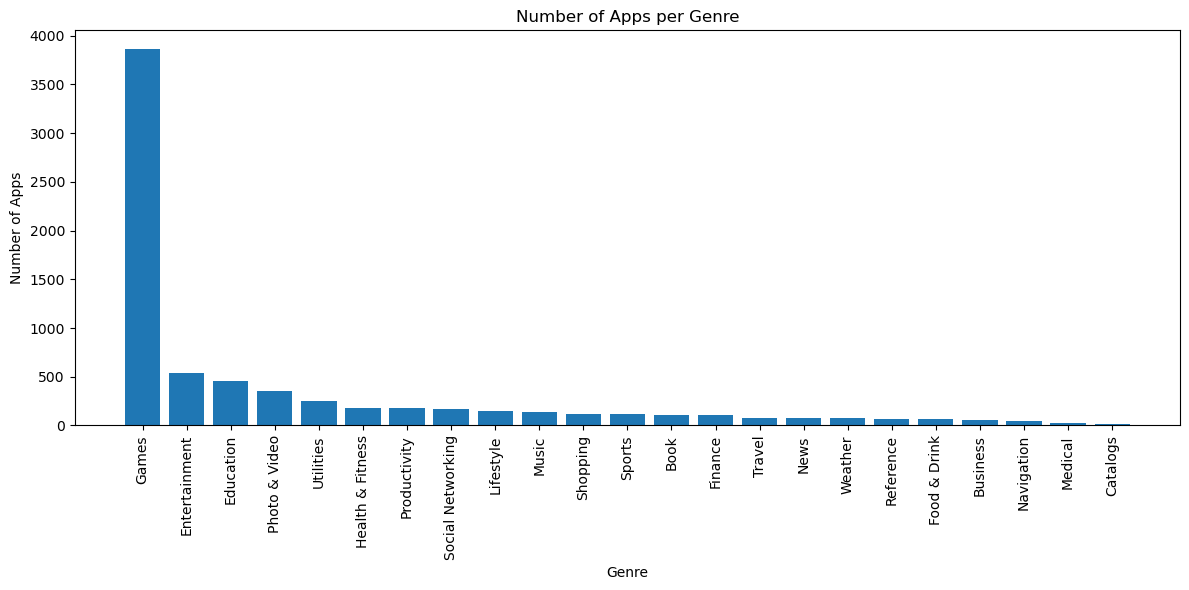

In [35]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.bar(apps_per_genre['prime_genre'], apps_per_genre['NumApps'])
plt.xlabel('Genre')
plt.ylabel('Number of Apps')
plt.title('Number of Apps per Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Histogram for Price Distribution:

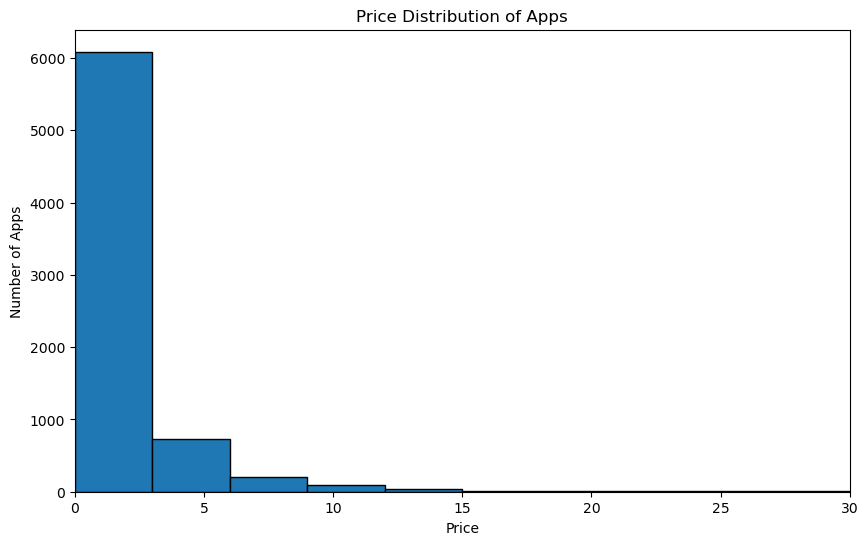

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(app_store_df['price'], bins=100, edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Number of Apps')
plt.title('Price Distribution of Apps')

plt.xlim(0, 30)

plt.show()


Bar Chart for Average Ratings by App Type:

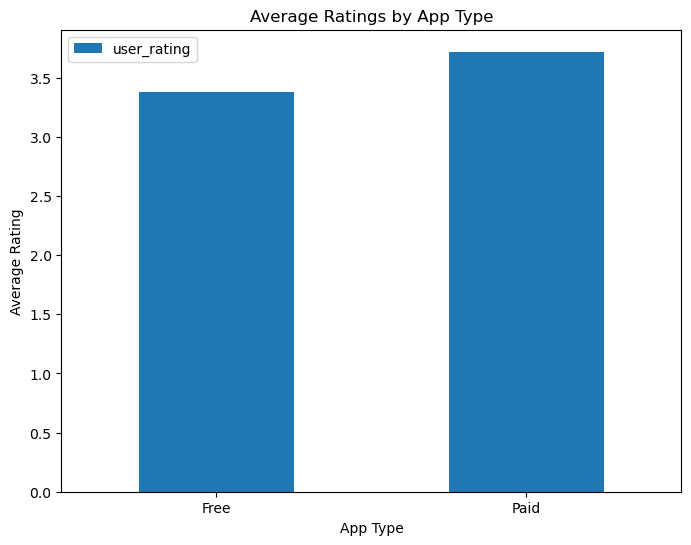

In [37]:
avg_rating_by_app_type.plot(kind='bar', x='App_Type', y='user_rating', figsize=(8, 6))
plt.xlabel('App Type')
plt.ylabel('Average Rating')
plt.title('Average Ratings by App Type')
plt.xticks(rotation=0)
plt.show()


In [38]:
avg_rating_by_app_type

,App_Type,user_rating
0,Free,3.376726
1,Paid,3.720949


Bar Chart for Average Ratings by Description Length:

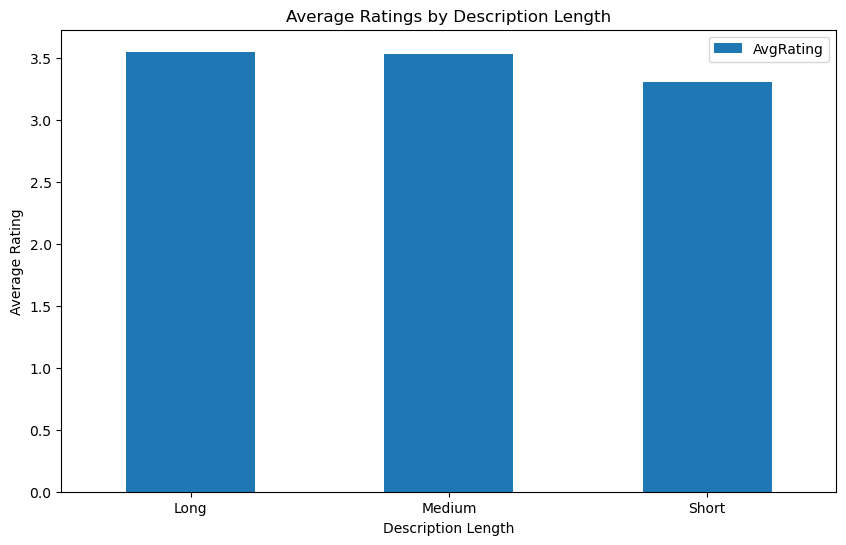

In [39]:
result_df1.plot(kind='bar', x='description_length', y='AvgRating', figsize=(10, 6))
plt.xlabel('Description Length')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Description Length')
plt.xticks(rotation=0)
plt.show()


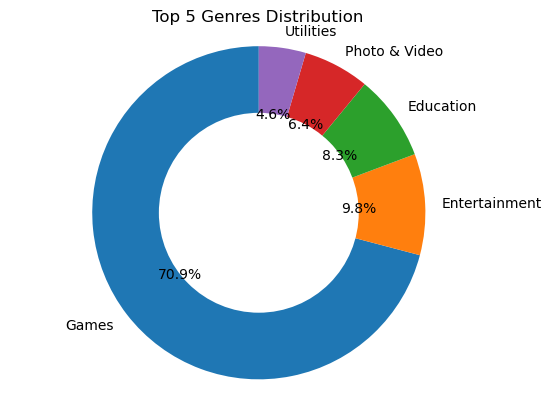

In [41]:
# The top 5 genres
top_5_genres = apps_per_genre.head(5)

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(top_5_genres['NumApps'], labels=top_5_genres['prime_genre'], autopct='%1.1f%%', startangle=90)

# Draw a circle in the center to create a donut chart
center_circle = plt.Circle((0,0),0.60,fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title('Top 5 Genres Distribution')
plt.show()

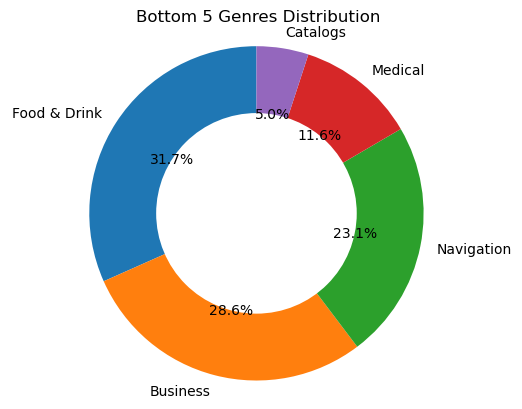

In [42]:
# The bottom 5 genres
bottom_5_genres = apps_per_genre.tail(5)

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(bottom_5_genres['NumApps'], labels=bottom_5_genres['prime_genre'], autopct='%1.1f%%', startangle=90)

# Draw a circle in the center to create a donut chart
center_circle = plt.Circle((0,0),0.60,fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title('Bottom 5 Genres Distribution')
plt.show()